In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) #Adjusts the configuration of the plots we will create.

#Read / load the data

df = pd.read_csv("movies.csv")

In [13]:
#lets look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [7]:
#Firstly checking if there is any missing data

for col in df.columns:
    prcnt_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col,prcnt_missing)) 

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
#so mostly above missing percent is almost zero so lets not worry about that for now.

In [9]:
#Checking what data types we have here.

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
# The votes, budget and gross are in floating point data type
# So changing it to int64 type just to stay hassle free and not messy.

df = df.fillna(0)
df["votes"]= df["votes"].astype("int64")
df["budget"]= df["budget"].astype("int64")
df["gross"]= df["gross"].astype("int64")
df["runtime"]= df["runtime"].astype("int64")

In [19]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      0      Drama  2020   
7664                                     Dream Round      0     Comedy  2020   
7665                                   Saving Mbango      0      Drama  2020   
7666                                    It's Just Us      0      Drama  2020   
7667                                       Tee em el      0     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    0.0        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.      146  
1      58853106          Columbia Pictures      104  
2     538375067                  Lucasfilm      124  
3      83453539         Paramount Pictures       88  
4      39846344             Orion Pictures       98  
...         ...                        ...      ...  
7663          0                          0       90  
7664          0  Cactus Blue Entertainment       90  
7665          0           Embi Productions        0  
7666          0                          0      120  
7667          0                PK 65 Films      102  

[7668 rows x 15 columns]

In [32]:
df.sort_values(by=["gross"], inplace = False, ascending = False)

#Just sorting the data in descending order of gross so that most earned to least earned gross is seen.

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century      0   Comedy  1989   
7667                                   Tee em el      0   Horror  2020   

                               released  score    votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000   Anthony Russo   
...                                 ...    ...      ...             ...   
1617   January 26, 1990 (United States)    4.5      274     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime  
5445  2847246203            Twentieth Century Fox      162  
7445  2797501328                   Marvel Studios      181  
3045  2201647264            Twentieth Century Fox      194  
6663  2069521700                        Lucasfilm      138  
7244  2048359754                   Marvel Studios      149  
...          ...                              ...      ...  
1617           0          Gibraltar Entertainment       92  
1614           0                    Allied Vision       85  
1606           0  Trans World Entertainment (TWE)       89  
1601           0         Budapest Stúdió Vállalat      104  
7667           0                      PK 65 Films      102  

[7668 rows x 15 columns]

In [33]:
# Just looking at all the data there is to check what further can be done

pd.set_option('display.max_rows', None)

In [34]:
df.sort_values(by=["gross"], inplace = False, ascending = False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [43]:
# There is no need to drop any duplicates because every movie has corresponding company studio
# But if you want to check you can do by sort_values
df["company"].sort_values

# But you can do drop_duplicates() in any other data set which needs to drop it. 

<bound method Series.sort_values of 0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
5                                      Paramount Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
12                                     Paramount Pictures
13                                     Paramount Pictures
14                                      Filmways Pictures
15                                        Rastar Pictures
16                              Metr

In [45]:
#Lets do some CORRELATION of data now
#Lets check what things are most correlation to the gross revenue (ignore the brackets, just for personal understanding)

In [46]:

# In my opinon budget has a high correlation with gross revenue
# And company will also have a high correlation with gross.

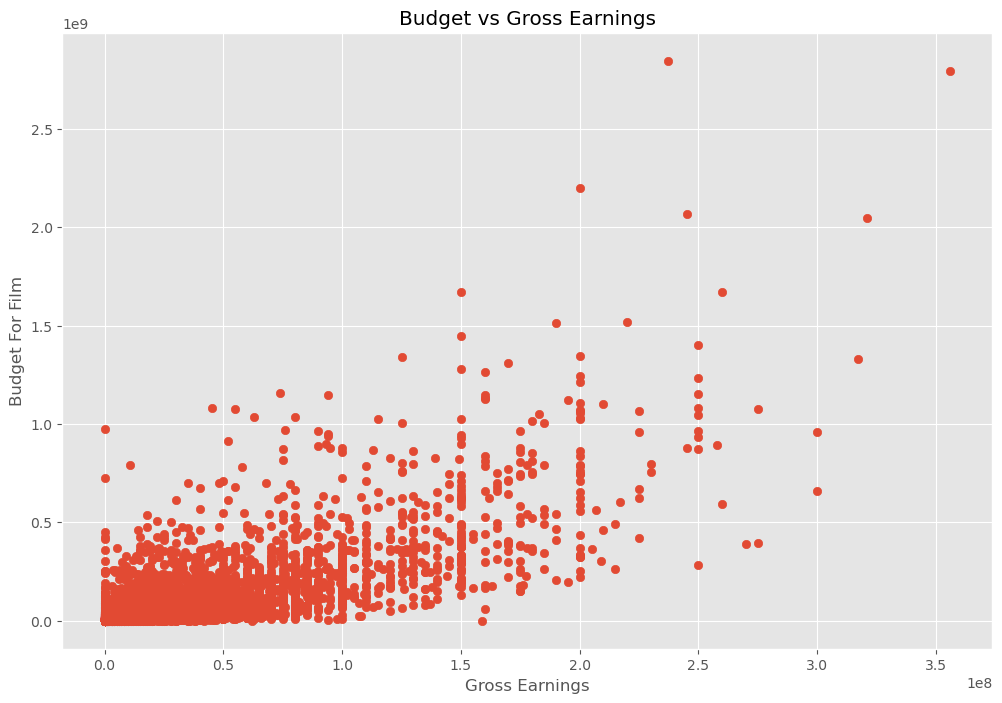

In [49]:
#Lets check with a scatter plot of budget vs revenue.


plt.scatter(x = df["budget"], y = df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget For Film")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

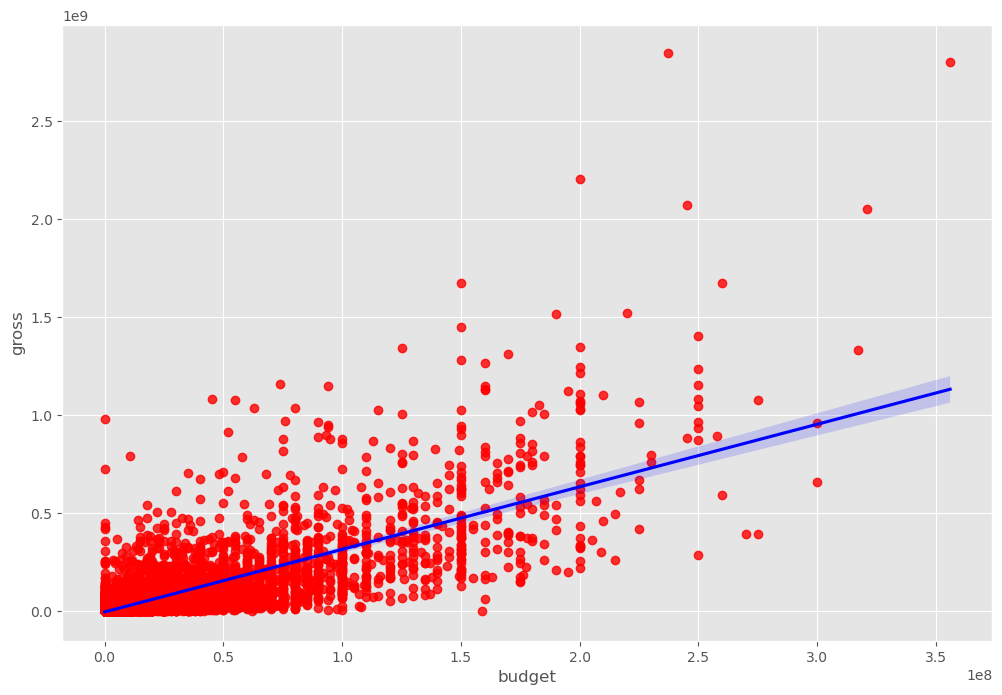

In [51]:
#Let me check with a regression plot of budget vs gross using seaborn.

sns.regplot(x = "budget", y = "gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [59]:
#lets check corr once

df.corr(method="pearson", numeric_only = True) #pearson, kendall, spearman (can check with any if i want)

year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

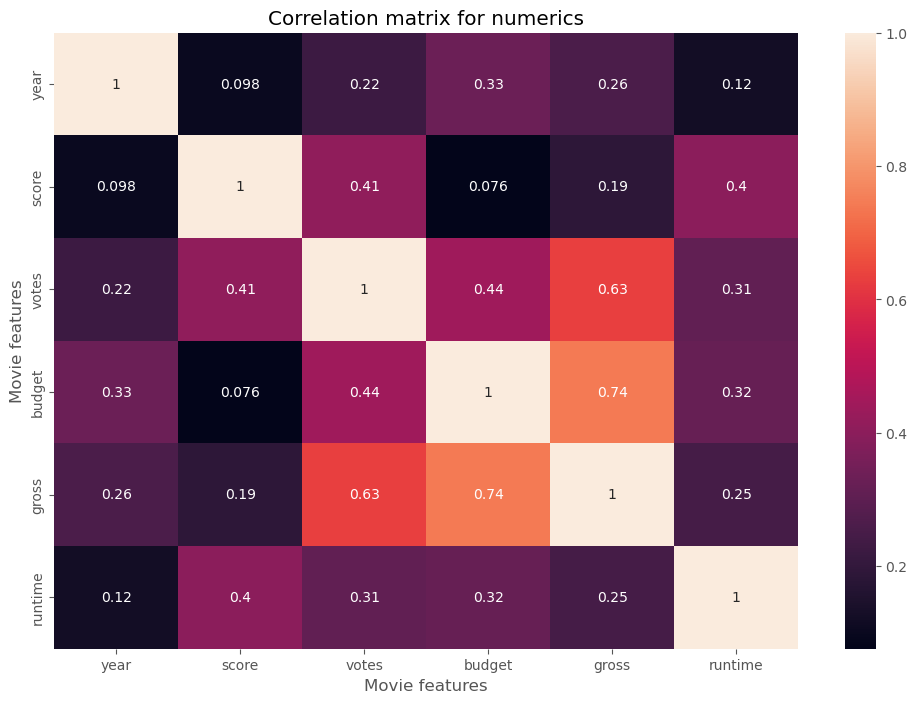

In [14]:
# I was right, there's high corr between budget and gross
#lets see a corr matrix real quick

correlation_matrix = df.corr(method = "pearson", numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for numerics")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [19]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7663  3705      -1      6  2020      2964    3.1       18.0      1500    2289   
7664  1678      -1      4  2020      1107    4.7       36.0       774    2614   
7665  4717      -1      6  2020       193    5.7       29.0      2061    2683   
7666  2843      -1      6  2020      2817    NaN        NaN      1184    1824   
7667  5394      -1     10  2020       391    5.7        7.0      2165    3344   

      star  country      budget        gross  company  runtime  
0     1047       54  19000000.0   46998772.0     2319    146.0  
1      327       55   4500000.0   58853106.0      731    104.0  
2     1745       55  18000000.0  538375067.0     1540    124.0  
3     2246       55   3500000.0   83453539.0     1812     88.0  
4      410       55   6000000.0   39846344.0     1777     98.0  
...    ...      ...         ...          ...      ...      ...  
7663  2421       55      7000.0          NaN       -1     90.0  
7664  1886       55         NaN          NaN      539     90.0  
7665  2040       55     58750.0          NaN      941      NaN  
7666   450       55     15000.0          NaN       -1    120.0  
7667  2463       44         NaN          NaN     1787    102.0  

[7668 rows x 15 columns]

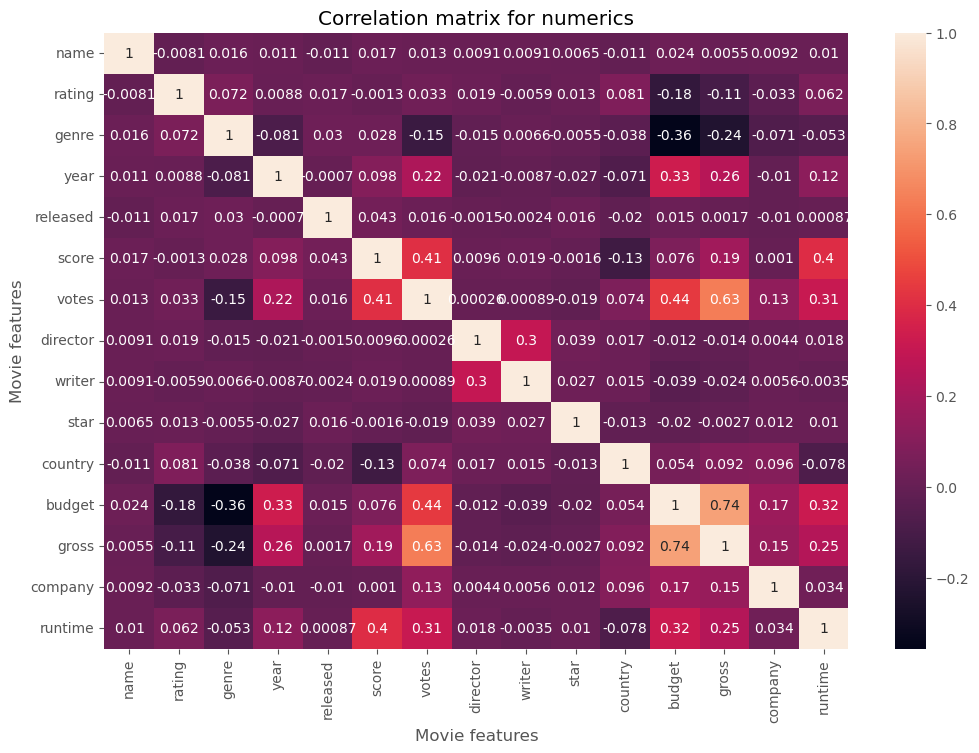

In [20]:
# Now that all the data is numerized i can correlate it and see.

correlation_matrix = df_numerized.corr(method = "pearson", numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for numerics")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [21]:
#So now its bigger as all the columns got correlated.
#let me quickly check organize and maybe unstack to get better view, i mean no need just for sake of it.

df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross     0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released  0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget    0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross     0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   

             gross   company   runtime  
name      0.005533  0.009211  0.010392  
rating   -0.107339 -0.032943  0.062145  
genre    -0.235650 -0.071067 -0.052711  
year      0.257486 -0.010431  0.120811  
released  0.001659 -0.010474  0.000868  
score     0.186258  0.001030  0.399451  
votes     0.630757  0.133204  0.309212  
director -0.014441  0.004404  0.017624  
writer   -0.023519  0.005646 -0.003511  
star     -0.002717  0.012442  0.010174  
country   0.092129  0.095548 -0.078412  
budget    0.740395  0.173214  0.320447  
gross     1.000000  0.154840  0.245216  
company   0.154840  1.000000  0.034402  
runtime   0.245216  0.034402  1.000000

In [23]:
#Unstacked form of above

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack #unstacked 
corr_pairs #Lets view and check

<bound method DataFrame.unstack of               name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross     0.005533 -0.107339 

In [46]:
#Lets pair up and check once more

#sorted_pairs = corr_pairs.sort_values() #sort values is new in updated version, let me try older one
#sorted_pairs #lets check

#Sort values is making it messier actually plus the attribute is diff since older version,
#so no need we already have systematic correlation above.

In [ ]:
# SO FINALLY VOTES AND BUDGET HAVE THE HIGHEST CORR WITH THE GROSS EARNINGS.
# I was right about Budget having high corr but Company has little to no corr so that was wrong.
# So we have all the data cleaned and checked and correlated now.